### **Some basic data visualizations**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
DATA_FOLDER = 'data'
BIKE_RENTALS_FILE = 'tripdata_connected.csv'
WEATHER_FILE = 'weather_data.csv'

bike_rentals_df = pd.read_csv(os.path.join('..', DATA_FOLDER, BIKE_RENTALS_FILE))
weather_df = pd.read_csv(os.path.join('..', DATA_FOLDER, WEATHER_FILE),
                         encoding="Windows-1250", sep=";")

In [4]:
bike_rentals_df.head()

,Ride_Id,Rideable_Type,Started_At,Ended_At,Start_Station_Name,Start_Station_Id,End_Station_Name,End_Station_Id,Start_Lat,Start_Lng,End_Lat,End_Lng,Member_Casual,Ride_Length,Day_Of_The_Week,Day
0,0BE9C131A5705D92,classic_bike,10/1/2021 0:00,10/1/2021 0:05,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,41.915983,-87.677335,41.924091,-87.676460,casual,0:05:00,6,Friday
1,ABA2BDC3595FC3E9,classic_bike,10/1/2021 0:00,10/1/2021 0:10,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,41.885483,-87.652305,41.900680,-87.662600,casual,0:10:00,6,Friday
2,74483AC18C8C6B90,classic_bike,10/1/2021 0:00,10/1/2021 0:08,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,41.943670,-87.648950,41.932590,-87.665936,casual,0:08:00,6,Friday
3,A7711BCB74523614,electric_bike,10/1/2021 0:02,10/1/2021 0:03,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.700000,casual,0:01:00,6,Friday
4,B0B9EB7622461EF4,classic_bike,10/1/2021 0:02,10/1/2021 0:17,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,41.842052,-87.617000,41.867118,-87.641088,member,0:15:00,6,Friday


<AxesSubplot: title={'center': 'Rideable_Type popularity'}>

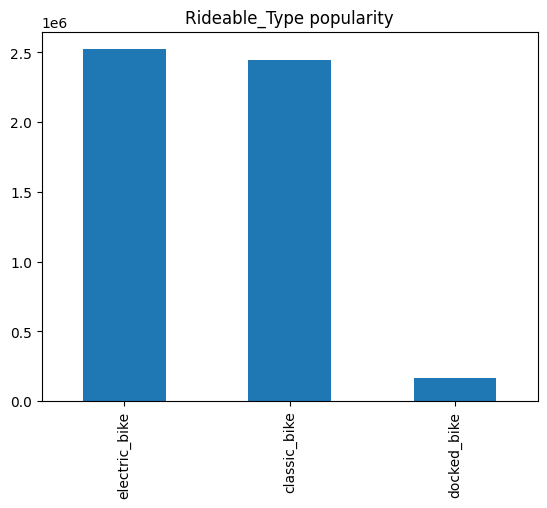

In [5]:
# count Rideable_Type popularity
rideable_type_counts = bike_rentals_df['Rideable_Type'].value_counts()
rideable_type_counts.plot(kind='bar', title='Rideable_Type popularity')

weather_df

In [6]:
weather_df

,time,temperature_2m (°C),precipitation (mm),cloudcover (%),windspeed_10m (km/h),latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,2021-10-01T00:00,"19,3",0,23.0,"9,4","41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
1,2021-10-01T01:00,"18,8",0,14.0,"9,9","41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
2,2021-10-01T02:00,"18,5",0,4.0,"9,6","41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
3,2021-10-01T03:00,"18,1",0,0.0,"9,7","41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
4,2021-10-01T04:00,"17,8",0,0.0,10,"41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
...,...,...,...,...,...,...,...,...,...,...,...
8758,2022-09-30T22:00,"15,3",0,0.0,"11,7","41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
8759,2022-09-30T23:00,"15,3",0,0.0,"11,2","41,800003","-87,6",179.0,-18000.0,America/Chicago,CDT
8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: title={'center': 'Member vs Casual Rentals'}>

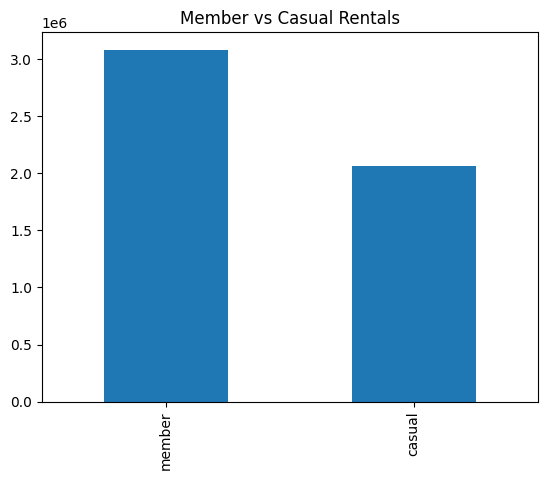

In [7]:
bike_rentals_df['Member_Casual'].value_counts().plot(
    kind='bar',
    title='Member vs Casual Rentals')

In [8]:
from datetime import datetime

def get_minutes_from_time(time: str):
    try:
        time_ = datetime.strptime(time, '%H:%M:%S')
    except:
        return None
    return time_.hour * 60 + time_.minute + time_.second / 60

df = bike_rentals_df.copy()
df['Ride_Length'] = df['Ride_Length'].apply(get_minutes_from_time)
df['Ride_Length'].dropna(inplace=True)

In [9]:
df['Ride_Length'].dropna(inplace=True)
df['Ride_Length'].describe()

count    5.138710e+06
mean     1.666030e+01
std      3.276989e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.031667e+01
75%      1.873333e+01
max      1.439950e+03
Name: Ride_Length, dtype: float64

## Which station is the most popular

<AxesSubplot: title={'center': 'Top 10 Start Stations'}>

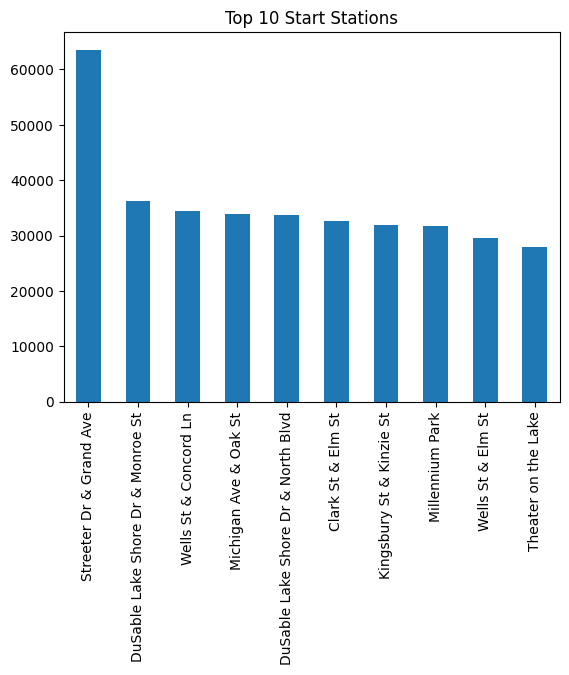

In [10]:
start_station_popularity = bike_rentals_df['Start_Station_Name'].value_counts()
start_station_popularity.head(10).plot(kind='bar', title='Top 10 Start Stations')

In [11]:
bike_rentals_df['End_Station_Name'].dtype

dtype('O')

<AxesSubplot: title={'center': 'Top 10 Start Stations'}>

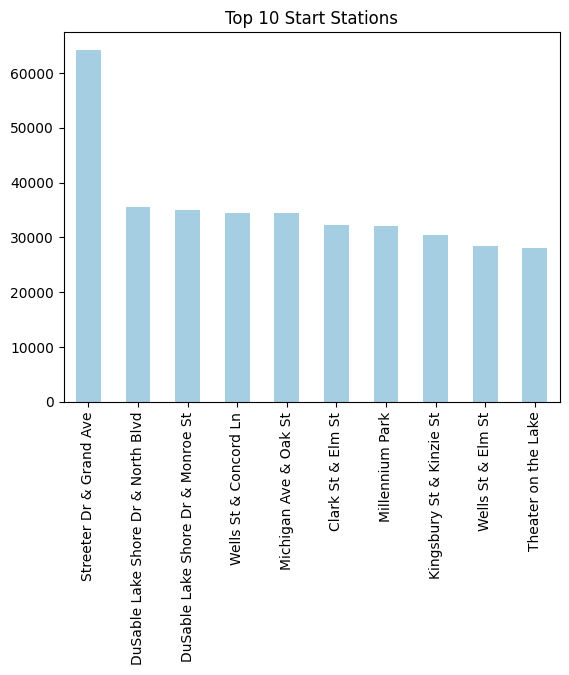

In [12]:
start_station_popularity = bike_rentals_df['End_Station_Name'].value_counts()
start_station_popularity.head(10).plot(kind='bar', title='Top 10 Start Stations', colormap='Paired')

In [13]:
# difference between start and end station
station_disproporions = bike_rentals_df['Start_Station_Name'].value_counts() - \
    bike_rentals_df['End_Station_Name'].value_counts()


<AxesSubplot: title={'center': 'Top 10 Station Disproportion'}>

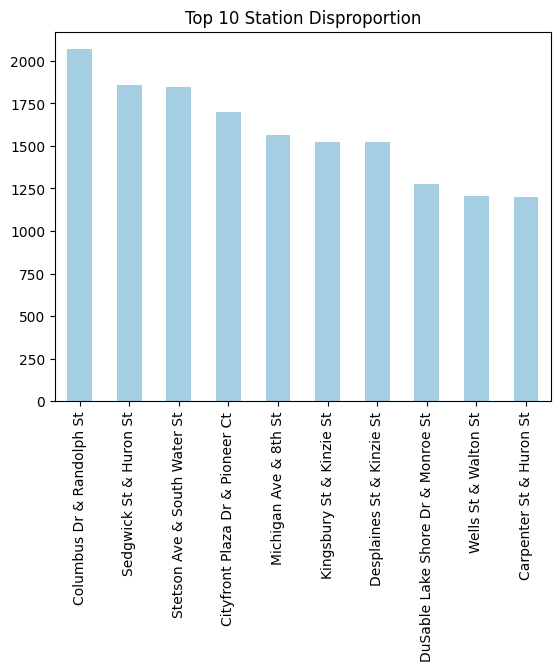

In [14]:
# plot station disproportion
station_disproporions.sort_values(ascending=False).head(10).plot(
    kind='bar', title='Top 10 Station Disproportion', colormap='Paired')

<AxesSubplot: title={'center': 'Top 10 Stations with Negative Disproportion'}>

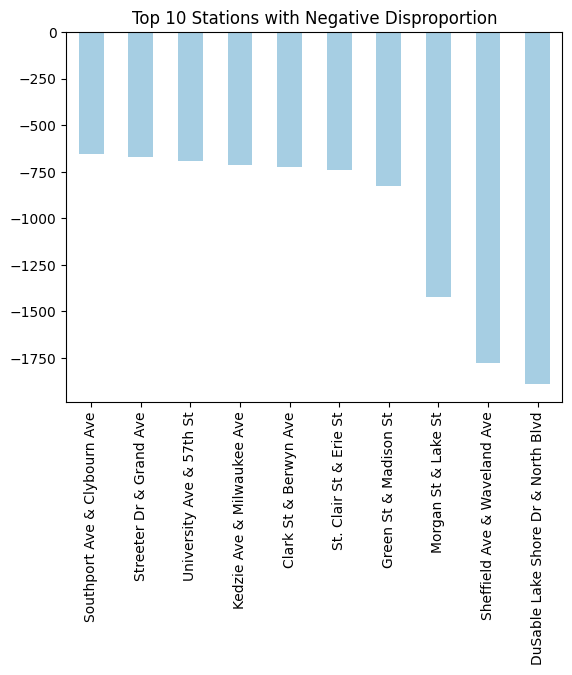

In [15]:
station_disproporions.sort_values(ascending=True).head(10).sort_values(ascending=False).plot(
    kind='bar', title='Top 10 Stations with Negative Disproportion', colormap='Paired')